# Use this notebook to generate figures from saved data for ScRRAMBLe

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import os
import pickle

%load_ext autoreload
%autoreload 2

In [2]:
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = 'Noto Sans CJK HK'

## Comparing ScRRAMBLe performance against baselines:
1. Consider ScRRAMBLe with a core-budget of 16.
1. The average connectivity is sweeped across three feedforward architectures:

    $\mathcal{A}_1: x_{1024 \times 1} \to 8 \to 8 \to \hat{y}$

    $\mathcal{A}_2: x_{1024 \times 1} \to 10 \to 6 \to \hat{y}$

    $\mathcal{A}_3: x_{1024 \times 1} \to 12 \to 4 \to \hat{y}$


In [3]:
# load the baselines data
logs_path = "/local_disk/vikrant/scrramble/logs"
ff_data_path = os.path.join(logs_path, "baseline_ff_a_98_2025-05-13.pkl")
log_data_path = os.path.join(logs_path, "baseline_logistic_regression_a_92_2025-05-13.pkl")

ff_data = pd.DataFrame(pickle.load(open(ff_data_path, "rb")))
log_data = pd.DataFrame(pickle.load(open(log_data_path, "rb")))

print(ff_data.head(5))
print(log_data.head(5))

   train_accuracy  train_loss  test_accuracy  test_loss
0        0.693835    1.771059       0.835737   1.630021
1        0.841250    1.623790       0.922576   1.544585
2        0.935000    1.529684       0.940505   1.522457
3        0.947930    1.515899       0.950521   1.512660
4        0.956328    1.506796       0.960437   1.502840
  train_accuracy train_loss test_accuracy  test_loss
0     0.61026895  2.0183728    0.80308497  1.8063489
1     0.83261716   1.746958     0.8630809  1.6910884
2      0.8658593  1.6781884    0.87950724   1.650795
3     0.87710935  1.6469151     0.8891226  1.6286407
4      0.8848828  1.6298021     0.8957332  1.6143172


In [4]:
ff_best_accuracy = ff_data["test_accuracy"].max()
log_best_accuracy = log_data["test_accuracy"].max()
ff_min_loss = ff_data["test_loss"].min()
log_min_loss = log_data["test_loss"].min()

# print all 4
print(f"FF best accuracy: {ff_best_accuracy}")
print(f"Logistic best accuracy: {log_best_accuracy}")
print(f"FF min loss: {ff_min_loss}")
print(f"Logistic min loss: {log_min_loss}")

FF best accuracy: 0.9759615659713745
Logistic best accuracy: 0.9205729365348816
FF min loss: 1.4854893684387207
Logistic min loss: 1.5541714429855347


In [5]:
# load the data
data_path = os.path.join("/local_disk/vikrant/scrramble/logs", "mnist_arch_dict_cores_16_resmp_10_2025-05-12.pkl")
ws16_data = pickle.load(open(data_path, "rb"))
ws16_df = pd.DataFrame(ws16_data)
ws16_df.head(10)

,arch,test_accuracy,train_accuracy,test_loss,train_loss,avg_slot_connectivity
0,0,0.831130,0.828984,1.607745,1.606603,1
1,0,0.701823,0.680234,1.703920,1.705397,1
2,0,0.719952,0.712547,1.724131,1.721112,1
3,0,0.665264,0.660078,1.814595,1.820045,1
4,0,0.805188,0.801328,1.736985,1.735319,1
5,0,0.858373,0.857019,1.558648,1.549194,1
6,0,0.798478,0.801900,1.788722,1.786417,1
7,0,0.722256,0.720713,1.729250,1.723015,1
8,0,0.855168,0.850188,1.573372,1.570692,1
9,0,0.778946,0.784077,1.648353,1.642366,1


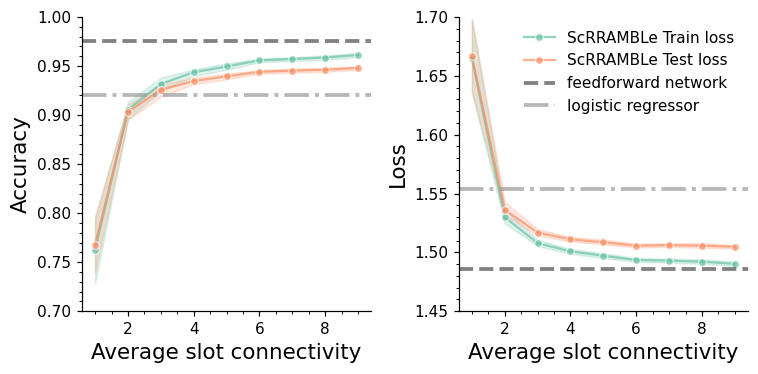

In [6]:
# line plots
pal1 = sns.color_palette("Set2", len(ws16_df['arch'].unique()))

fig, ax = plt.subplots(1, 2, dpi=110, figsize=(7, 3.5))

# for tick in ax[0].get_xticklabels(which='both'):
#     tick.set_fontname('Arial')

sns.lineplot(data=ws16_df, x='avg_slot_connectivity', y='train_accuracy', err_style='band', ax=ax[0], color=pal1[0], label='ScRRAMBLe Train accuracy', lw=1.5, alpha=.7, marker='o', markersize=5)
sns.lineplot(data=ws16_df, x='avg_slot_connectivity', y='test_accuracy', err_style='band', ax=ax[0], color=pal1[1], label='ScRRAMBLe Test accuracy', lw=1.5, alpha=.7, marker='o', markersize=5)
ax[0].set_xlabel(r"Average slot connectivity", fontsize = 14)
ax[0].set_ylabel(r"Accuracy", fontsize = 14)
ax[0].axhline(y=ff_best_accuracy, color='0.3', linestyle='--', label='feedforward network', lw = 2.5, alpha=.7)
ax[0].axhline(y=log_best_accuracy, color='0.6', linestyle='-.', label='logistic regressor', lw = 2.5, alpha=.7)
ax[0].minorticks_on()
ax[0].legend([], [], frameon=False)
ax[0].set_ylim(0.7, 1.0)

sns.lineplot(data=ws16_df, x='avg_slot_connectivity', y='train_loss', err_style='band', ax=ax[1], label="ScRRAMBLe Train loss", color=pal1[0], lw=1.5, alpha=.7, marker='o', markersize=5)
sns.lineplot(data=ws16_df, x='avg_slot_connectivity', y='test_loss', err_style='band', ax=ax[1], label="ScRRAMBLe Test loss", color=pal1[1], lw=1.5, alpha=.7, marker='o', markersize=5)
ax[1].axhline(y=ff_min_loss, color='0.3', linestyle='--', label='feedforward network', lw = 2.5, alpha=.7)
ax[1].axhline(y=log_min_loss, color='0.6', linestyle='-.', label='logistic regressor', lw = 2.5, alpha=.7)
ax[1].minorticks_on()
ax[1].legend(frameon=False)
ax[1].set_xlabel(r"Average slot connectivity", fontsize = 14)
ax[1].set_ylabel(r"Loss", fontsize = 14)
ax[1].set_ylim(1.45, 1.7)

plt.tight_layout()
sns.despine()

/tmp/ipykernel_1230033/2499075153.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'$\mathcal{A}_1$', r'$\mathcal{A}_2$', r'$\mathcal{A}_3$'])


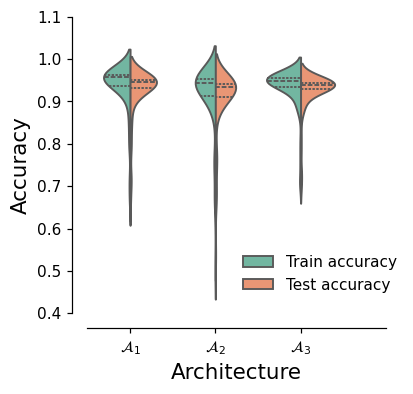

In [7]:
# violin plot
# plotting accuracies for every architecture
melt_df = pd.melt(
    ws16_df,
    id_vars=['arch', 'test_loss', 'train_loss', 'avg_slot_connectivity'],
    value_vars=['train_accuracy', 'test_accuracy'],
    var_name='accuracy_type',
    value_name='accuracy'
)

melt_df.head()

label_mapping = {
    'train_accuracy': 'Train accuracy',
    'test_accuracy': 'Test accuracy'
}

melt_df['accuracy_type'] = melt_df['accuracy_type'].map(label_mapping)

pal_set2 = sns.color_palette("Set2", 2)
fig, ax = plt.subplots(dpi=110, figsize=(3.5, 3.5))
sns.violinplot(
    data=melt_df,
    x='arch',
    y='accuracy',
    hue='accuracy_type',
    palette=pal_set2,
    split=True,
    inner='quartile',
)

# ax.axhline(y=0.95, color='r', ls='dashdot')

ax.set_ylim(0.4, 1.1)
ax.set_xlim(-0.5, 3)
# ax.set_xticklabels([(8, 8), (10, 6), (12, 4)])
ax.set_xticklabels([r'$\mathcal{A}_1$', r'$\mathcal{A}_2$', r'$\mathcal{A}_3$'])
# ax.set_xlabel(r"Architecture ($N_c^i$, $N_c^o$)", fontsize=14)
ax.set_xlabel(r"Architecture", fontsize=14)
ax.set_ylabel("Accuracy", fontsize=14)
# ax.set_xlim(0, 2)
ax.legend(title='', loc=(0.5, 0.05), frameon=False)
sns.despine(offset=10)